In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import cvxpy  as cp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
assets = ['SPY', 'EFA', 'EEM', 'PSP', 'QAI', 'HYG', 'DBC', 'IYR', 'IEF', 'BWX', 'TIP', 'SHV']

start = "2010-01-01"
end = "2022-12-31"

In [5]:
df = yf.download(assets, start, end)['Adj Close']
df.head()

[*********************100%%**********************]  12 of 12 completed


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2010-01-04,23.982332,23.234581,32.429028,37.994480,39.688229,67.079697,28.448299,38.011715,23.598108,97.784096,87.129951,73.683762
2010-01-05,24.095949,23.262199,32.664410,38.027969,39.876484,67.374222,28.516623,38.419125,23.658331,97.748604,87.360565,73.924240
2010-01-06,24.053873,23.676443,32.732738,38.188702,39.979610,67.102379,28.504194,38.622833,23.701347,97.757492,87.422089,73.733276
2010-01-07,23.915009,23.381868,32.542919,38.041367,40.141018,67.102379,28.758818,38.826542,23.641125,97.757492,87.791161,73.846451
2010-01-08,24.053873,23.363457,32.801075,38.342751,40.203770,67.185455,28.566309,38.948776,23.701347,97.792984,88.083282,74.002068


In [8]:
price = df.resample('M').last()
#price = price.subtract(ret['SHV'], axis=0)
price

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2010-01-31,23.565722,20.887190,29.065397,35.148071,38.657131,68.499573,26.970312,36.585773,22.970089,97.801826,82.563164,74.617477
2010-02-28,23.622707,21.752502,29.581713,35.241840,39.381321,68.726852,28.442093,37.359848,22.961485,97.803612,85.138710,73.645020
2010-03-31,23.618473,21.651243,31.981035,37.492176,40.221535,68.000511,31.214766,40.333973,23.400238,97.792961,90.321907,73.640808
2010-04-30,23.276611,22.498144,31.927904,36.440681,40.995602,69.124405,33.208790,41.067318,23.357224,97.786728,91.719223,75.492859
2010-05-31,22.428270,20.215191,28.928724,32.361946,39.078815,71.151955,31.321369,35.770935,22.385082,97.800941,84.431702,75.637581
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,21.764418,24.368176,38.536140,60.347389,68.623604,97.054031,90.461266,47.682137,28.321804,103.894958,385.899139,108.934448
2022-09-30,20.387323,22.653309,34.089291,54.782124,66.056824,92.458557,78.960526,40.476723,27.194422,103.924240,350.224365,101.600586
2022-10-31,20.428473,23.799713,33.414928,58.009785,68.280167,91.114197,81.452904,43.682323,27.596357,104.086090,378.689056,103.043724


In [9]:
ret = price.pct_change().dropna()
#ret = ret.drop(columns = ['SHV'])
ret.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2010-02-28,0.002418,0.041428,0.017764,0.002668,0.018734,0.003318,0.054570,0.021158,-0.000375,0.000018,0.031195,-0.013033
2010-03-31,-0.000179,-0.004655,0.081108,0.063854,0.021335,-0.010569,0.097485,0.079608,0.019108,-0.000109,0.060879,-0.000057
2010-04-30,-0.014474,0.039116,-0.001661,-0.028046,0.019245,0.016528,0.063881,0.018182,-0.001838,-0.000064,0.015470,0.025150
2010-05-31,-0.036446,-0.101473,-0.093936,-0.111928,-0.046756,0.029332,-0.056835,-0.128968,-0.041621,0.000145,-0.079455,0.001917
2010-06-30,0.011479,-0.017760,-0.013987,-0.020619,0.011112,0.030483,-0.046701,-0.059091,0.014989,0.000327,-0.051741,0.012799


In [10]:
ex_ret = ret.subtract(ret['SHV'], axis=0)
ex_ret = ex_ret.drop(columns = ['SHV'])
ex_ret

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2010-02-28,0.002400,0.041410,0.017746,0.002650,0.018715,0.003300,0.054552,0.021140,-0.000393,0.031177,-0.013051
2010-03-31,-0.000070,-0.004546,0.081217,0.063963,0.021444,-0.010460,0.097594,0.079716,0.019217,0.060988,0.000052
2010-04-30,-0.014411,0.039179,-0.001598,-0.027982,0.019309,0.016591,0.063945,0.018246,-0.001774,0.015534,0.025214
2010-05-31,-0.036591,-0.101618,-0.094081,-0.112073,-0.046901,0.029187,-0.056980,-0.129114,-0.041766,-0.079600,0.001772
2010-06-30,0.011152,-0.018086,-0.014313,-0.020946,0.010785,0.030156,-0.047028,-0.059418,0.014662,-0.052068,0.012472
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.057542,-0.016219,-0.014545,-0.062451,-0.044371,-0.039820,-0.059906,-0.084845,-0.012914,-0.042084,-0.028324
2022-09-30,-0.063555,-0.070655,-0.115676,-0.092502,-0.037686,-0.047631,-0.127416,-0.151395,-0.040088,-0.092728,-0.067605
2022-10-31,0.000461,0.049049,-0.021340,0.057361,0.032101,-0.016098,0.030007,0.077639,0.013223,0.079718,0.012647


### 1)

In [11]:
def performance_summary(retsx):
    summary = retsx.mean().to_frame('Annualized Return') * 11
    summary['Annualized volatility'] = retsx.std()*np.sqrt(11)
    summary['Annualized Sharpe Ratio'] = summary['Annualized Return']/ summary['Annualized volatility']
    return summary

In [13]:
ex_perform = performance_summary(ret)
ex_perform

,Annualized Return,Annualized volatility,Annualized Sharpe Ratio
BWX,-0.001676,0.077766,-0.021556
DBC,0.022846,0.169119,0.135089
EEM,0.034169,0.178519,0.191405
EFA,0.055028,0.154475,0.356224
HYG,0.044534,0.076835,0.579606
IEF,0.023425,0.058590,0.399808
IYR,0.092300,0.159237,0.579640
PSP,0.037997,0.211253,0.179866
QAI,0.016385,0.048339,0.338966
SHV,0.004938,0.002859,1.727509


### 2)

In [111]:
best_sharp = performance_summary(ex_ret)['Annualized Sharpe Ratio'].idxmax()
worst_sharp = performance_summary(ex_ret)['Annualized Sharpe Ratio'].idxmin()

print(f"Найкращий: {best_sharp}")
print(f"Найгірший: {worst_sharp}")

Найкращий: SPY
Найгірший: BWX


### 3)

In [112]:
asset_corr = ex_ret.corr()
asset_corr

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.316279,0.642229,0.607940,0.610488,0.411008,0.500570,0.546849,0.664369,0.445716,0.596922
DBC,0.316279,1.000000,0.566477,0.592300,0.540713,-0.358297,0.375094,0.552671,0.541824,0.523679,0.117072
EEM,0.642229,0.566477,1.000000,0.835850,0.705359,-0.111651,0.584888,0.769182,0.789743,0.711457,0.318765
EFA,0.607940,0.592300,0.835850,1.000000,0.794037,-0.154017,0.689571,0.908058,0.851695,0.867951,0.295586
HYG,0.610488,0.540713,0.705359,0.794037,1.000000,0.041856,0.735735,0.826897,0.809475,0.795131,0.477608
IEF,0.411008,-0.358297,-0.111651,-0.154017,0.041856,1.000000,0.138614,-0.121231,0.059763,-0.174783,0.700317
IYR,0.500570,0.375094,0.584888,0.689571,0.735735,0.138614,1.000000,0.746830,0.680976,0.762679,0.536637
PSP,0.546849,0.552671,0.769182,0.908058,0.826897,-0.121231,0.746830,1.000000,0.853958,0.910726,0.380703
QAI,0.664369,0.541824,0.789743,0.851695,0.809475,0.059763,0.680976,0.853958,1.000000,0.838035,0.479088
SPY,0.445716,0.523679,0.711457,0.867951,0.795131,-0.174783,0.762679,0.910726,0.838035,1.000000,0.316537


Text(0.5, 1.0, 'Correlation Heatmap')

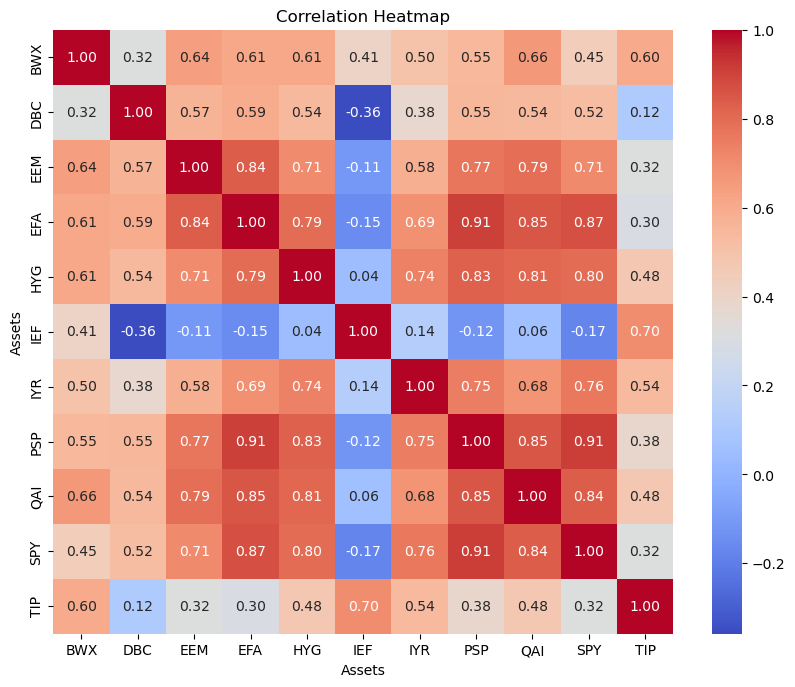

In [113]:
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(asset_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.title('Correlation Heatmap')

### 4)

In [114]:
TIPS_sr = ex_perform[ex_perform.index == 'TIP']['Annualized Sharpe Ratio']

ex_perform['Outperformed_TIPS'] = ex_perform['Annualized Sharpe Ratio'] >= float(TIPS_sr)
ex_perform[ex_perform.index.isin(['IEF', 'TIP'])]

,Annualized Return,Annualized volatility,Annualized Sharpe Ratio,Outperformed_TIPS
IEF,0.020992,0.060797,0.345272,False
TIP,0.022628,0.051423,0.440043,True


### 3.2)

In [115]:
tr_perf = performance_summary(ex_ret)
mean_ret = tr_perf['Annualized Return']
sigma = ex_ret.cov()

In [116]:
def tangency_port(mu,sigma):
    cov = np.array(sigma)
    inv = np.linalg.inv(cov)
    num = inv @ mu
    one_vector = np.ones(sigma.shape[0])
    den = np.dot(one_vector.T, num)
    return num/den

In [117]:
tangency_p = tangency_port(mean_ret, sigma)
tangency_p

array([-0.83785335,  0.15164626,  0.19255119,  0.50284631,  0.7569879 ,
        1.7723403 , -0.31056249, -1.27399041, -2.70602203,  2.38787511,
        0.3641812 ])

### 4.2)

In [118]:
ret1 = np.dot(tangency_p, mean_ret)
ret1

0.30384525655619476

In [119]:
vol = np.sqrt(tangency_p.T @ sigma @ tangency_p)*np.sqrt(12)
vol

0.1514236486408352

In [120]:
def my_performance(mu, sigma, omega):
    ret = np.dot(omega, mu)
    vol = np.sqrt(omega.T @ sigma @ omega)*np.sqrt(12)
    return pd.DataFrame([[ret,vol]], columns = ['ret', 'col'], index = ['tang_port'])

my_performance(mean_ret, sigma, tangency_p)

,ret,col
tang_port,0.303845,0.151424


### 5)

In [121]:
def gmv_port(sigma):
    cov = np.array(sigma)
    inv = np.linalg.inv(cov)
    one_vector = np.ones(sigma.shape[0])
    num = inv @ one_vector
    den = np.dot(one_vector.T, num)
    return num/den

gmv_port(sigma)

array([-0.10717695,  0.01086831, -0.06300313,  0.03146996,  0.10382698,
        0.04214963, -0.04148566, -0.14747732,  0.9824617 , -0.02755539,
        0.21592187])

### 6)

In [125]:
omega = gmv_port(sigma)
tangency_weights = tangency_port(mean_ret, sigma)
target_return = 0.015

def target_func(target_return, omega, tangency_p):
    return pd.DataFrame(target_return*tangency_p +(1-target_return)*omega)

print(performance_summary(target_func(target_return, omega, tangency_weights)))

GMV Portfolio:
   Annualized Return  Annualized volatility  Annualized Sharpe Ratio
0           1.090909               1.028834                 1.060335


In [130]:
w_i = []
for i in range(0,11):
    w_i.append(1/11)

w_i = pd.DataFrame(w_i)
print(performance_summary(w_i))



   Annualized Return  Annualized volatility  Annualized Sharpe Ratio
0           1.090909           5.042051e-17             2.163622e+16


### 7)